### 8.3 Course Project
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    
# Classification Factors Contributing to Employee Attrition 

</center><br>
<br>
<br>
<br>
<center>
DSC 630 Predictive Analytics<br>
Jennifer Barrera Conde, Jonathan Cannaday, Miles Peña Gonzalez
<br>
Milestone 4<br>
7/26/2024
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Explain your process for prepping the data

   - ### Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

   - ### Extract Data

In [2]:
path = (
    'C:\\Users\\Owner\\OneDrive\\Desktop\\'
    'DataScience\\2024_Summer_Predictive_Analysis\\'
)
file = "attrition_data.xlsx"
file_path = path + file
df = pd.DataFrame(pd.read_excel(file_path))

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Our dataset consists of 1470 rows and 35 columns.

There are no null values in any of the columns.

The target variable is ‘attrition’.

The dataset includes a mix of nominal, ordinal, and continuous variables that support the target.

Each column will be identified with its respective data type.

   - ### Transform Data

In [4]:
continuous_cols =['Age', 'DistanceFromHome',
                    'EmployeeCount', 'NumCompaniesWorked',
                   'PercentSalaryHike', 'StandardHours',
                    'TotalWorkingYears', 'TrainingTimesLastYear',
                   'YearsAtCompany', 'YearsInCurrentRole',
                    'YearsSinceLastPromotion',
                  'YearsWithCurrManager']

continuous_high_cols = ['HourlyRate', 'DailyRate'
                        , 'MonthlyIncome',
                        'MonthlyRate']

ordinal_cols = ['Education', 'EnvironmentSatisfaction',
                'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                'PerformanceRating', 'RelationshipSatisfaction',
                'StockOptionLevel', 'WorkLifeBalance']

nominal_cols = ['Attrition', 'BusinessTravel', 'Department',
                'EducationField', 'Gender', 'JobRole',
                'MaritalStatus', 'Over18', 'OverTime']

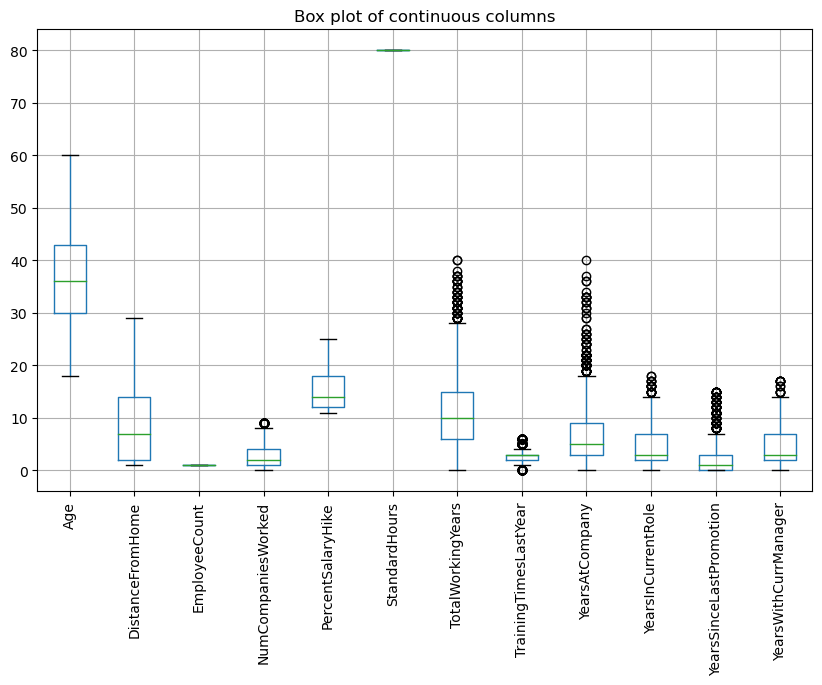

In [5]:
# continuous columns box plot
plt.figure(figsize=(10,6))
df[continuous_cols].boxplot()
plt.title('Box plot of continuous columns')
plt.xticks(rotation=90)
plt.show()

The data for continuous variables falls within a reasonable spread, with ‘age’ being the maximum.

Columns ‘EmployeeCount’, ‘Over18’, ‘EmployeeCount’, and ‘StandardHours’ will be dropped as they don’t seem to add much value.

The outliers, indicated in black, don’t appear to be problematic and may remain in the final results.

We could replace these outliers with the mean to keep the data close to the mean for each variable.

In [6]:
# drop columns
redundant_cols = ['EmployeeCount',
                  'Over18',
                  'EmployeeNumber',
                  'StandardHours']
df = df.drop(columns=redundant_cols)

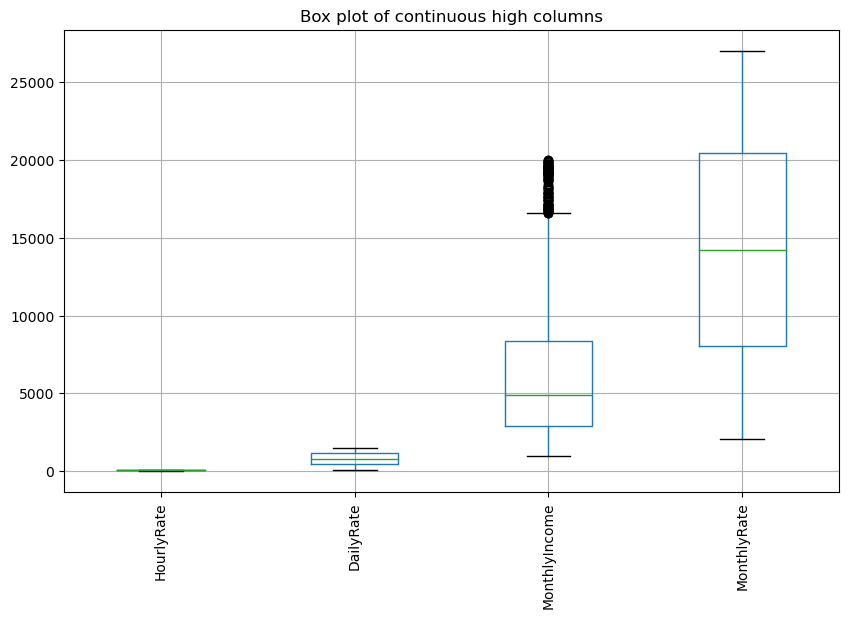

In [7]:
# continuous columns
plt.figure(figsize=(10,6))
df[continuous_high_cols].boxplot()
plt.title('Box plot of continuous high columns')
plt.xticks(rotation=90)
plt.show()

Interestingly, the monthly rate appears to follow a normal distribution.

However, monthly income seems to be skewed.

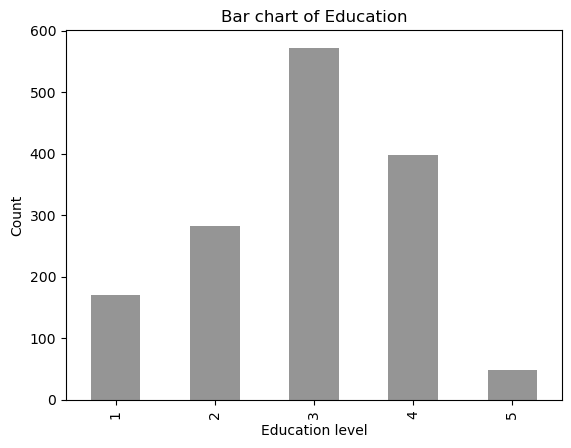

In [8]:
# Bar Chart
df['Education'].value_counts().sort_index().plot(kind='bar', color=plt.cm.Greys(.5))
plt.title('Bar chart of Education')
plt.xlabel('Education level')
plt.ylabel('Count')
plt.show()

Looking at the education levels from our sample data, level 3 is notably the highest and closely follows a normal distribution.

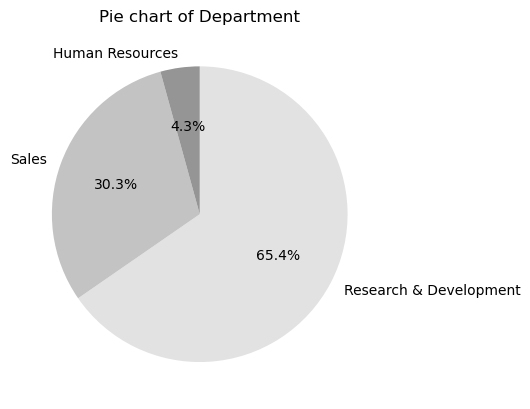

In [9]:
# Varying shades of gray
num_segments = df['Department'].nunique()
colors = plt.cm.Greys(np.linspace(.2, .5, num_segments))

# custom colors
df['Department'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors,
    startangle=90,  
    counterclock=False
)
plt.title('Pie chart of Department')
plt.ylabel('')  # Remove the y-label
plt.show()

The majority of candidates fall within the research and development and sales groups.

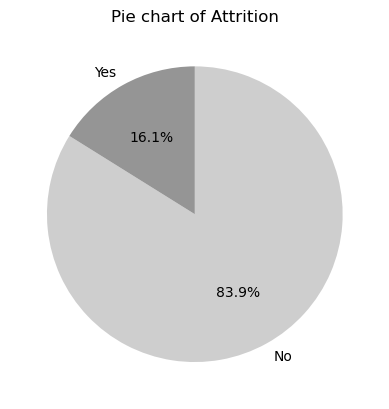

In [10]:
# Varying shades of gray
num_segments = df['Attrition'].nunique()
colors = plt.cm.Greys(np.linspace(.3, .5, num_segments))

# custom colors
df['Attrition'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors,
    startangle=90,  
    counterclock=False
)
plt.title('Pie chart of Attrition')
plt.ylabel('')  # Remove the y-label
plt.show()

From the graph, we can see that the majority of candidates did not fall within the attrition group.

In [11]:
# multi-class categorical variables
multi_class_vars = ['BusinessTravel', 'Department',
                    'EducationField', 'JobRole',
                    'MaritalStatus', 'Gender', 'OverTime' ]
# one-hot encoding
df = pd.get_dummies(df, columns=multi_class_vars)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Age                                1470 non-null   int64 
 1   Attrition                          1470 non-null   object
 2   DailyRate                          1470 non-null   int64 
 3   DistanceFromHome                   1470 non-null   int64 
 4   Education                          1470 non-null   int64 
 5   EnvironmentSatisfaction            1470 non-null   int64 
 6   HourlyRate                         1470 non-null   int64 
 7   JobInvolvement                     1470 non-null   int64 
 8   JobLevel                           1470 non-null   int64 
 9   JobSatisfaction                    1470 non-null   int64 
 10  MonthlyIncome                      1470 non-null   int64 
 11  MonthlyRate                        1470 non-null   int64 
 12  NumCom

In summary, we have made several key observations and changes to the dataset:

- **Data Type Changes and Restructuring:**
  - Adjusted data types and restructured some columns into quantifiable values.

- **Department Group Distribution:**
  - The data is skewed towards the Research and Development department.

- **Education Level:**
  - The education level of individuals is normally distributed, centered around a mean of 3.

- **Monthly Income Distribution:**
  - Monthly income shows a normal distribution with the mean approximately at 15K.

- **Attrition Rate:**
  - The sample indicates an attrition rate of about 16%.

- **Data Quality:**
  - No null values were present in the dataset.
  - Outliers were not prominent enough to require changes.

- **Sample Size and Representativeness:**
  - The dataset consists of around 1400 individuals. The representativeness of this sample size relative to the population has yet to be determined.

- **Irrelevant Features Removed:**
  - The columns 'Employee ID' and 'Over18' were removed as they did not provide any useful information.


### Build and evaluate at least one model

For this step we will be using the random forest classifier, and logistic regression.

By comparing the metrics from both models, we can determine which model performs better for this dataset. Additionally, the feature importance from the Random Forest model and the coefficients from the Logistic Regression model will provide insights into the factors influencing employee attrition.

### Random Forest Classifier:

In [12]:
# Convert target variable 'Attrition' to numeric
df['Attrition'] =(
    df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
)

In [13]:
# Define features and target
X = df.drop(columns=['Attrition'])
y = df['Attrition']

In [14]:
# Split the data
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.3, random_state=42)
)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Build the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

In [17]:
# Evaluate the Random Forest model
print("Random Forest Classifier:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
[[376   4]
 [ 55   6]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.60      0.10      0.17        61

    accuracy                           0.87       441
   macro avg       0.74      0.54      0.55       441
weighted avg       0.83      0.87      0.82       441



In [18]:
# Answers which top 5 features are contributing.
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names,
     'Importance': importances}
).sort_values(by='Importance', ascending=False)
print(feature_importance_df.head(5))

              Feature  Importance
9       MonthlyIncome    0.085854
0                 Age    0.056183
16  TotalWorkingYears    0.050355
1           DailyRate    0.049479
10        MonthlyRate    0.044905


From the column importance it looks like income and age seems to be factors contributing to attrition.

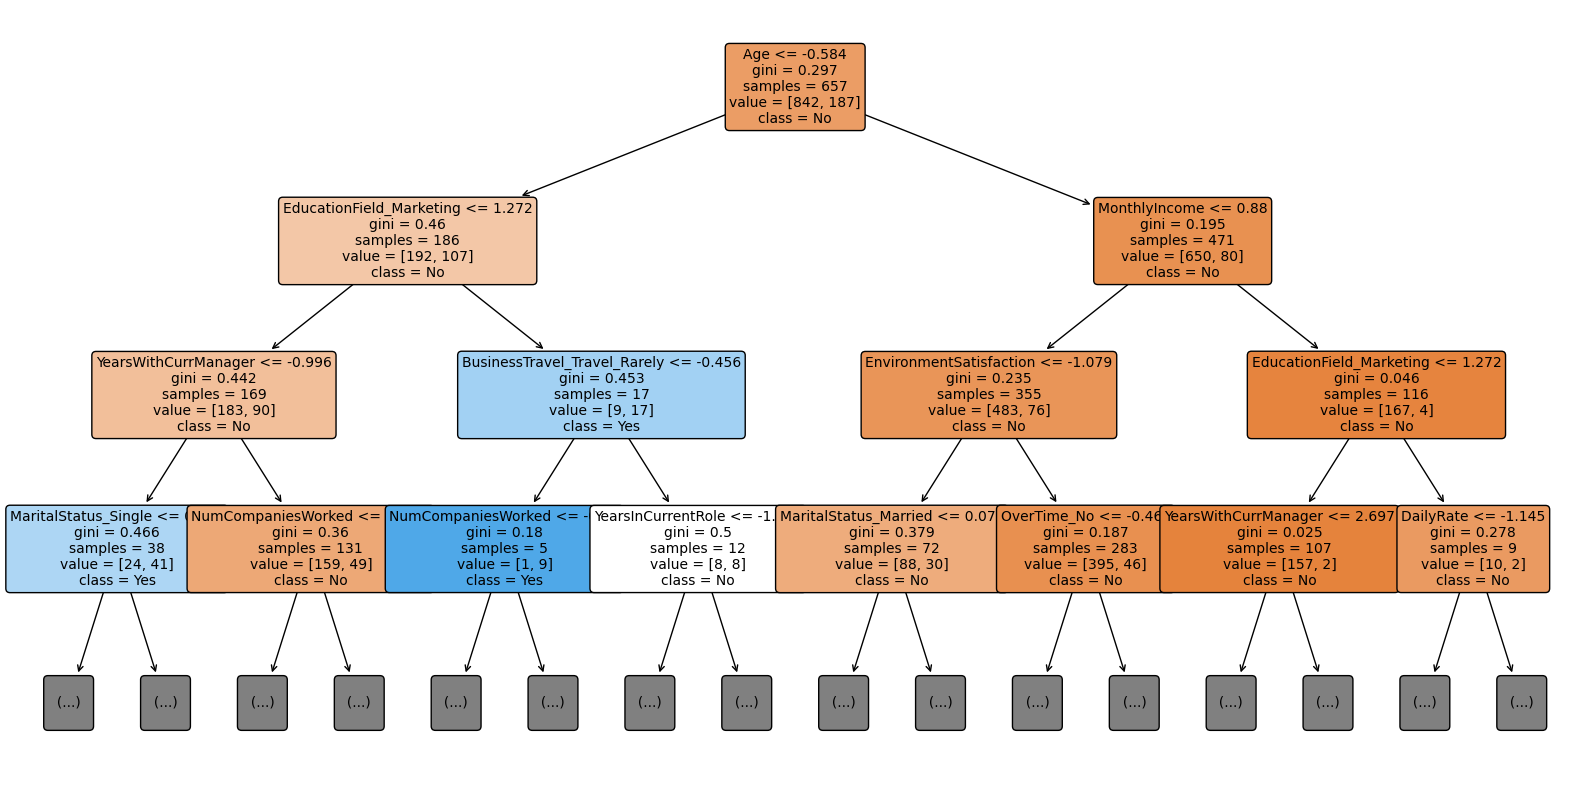

In [19]:
feature_names = X.columns.tolist()

# first tree
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], 
          feature_names=feature_names, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          max_depth=3,  # Easier visualization
          fontsize=10)
plt.show()

We can see the initial tree creation and the influencing factors. Age, Education, and Income are the top nodes.

### Results of the Random Forrest Classifier:

__Confusion Matrix:__<br>
_True Negatives (TN):_ 376<br>
_False Positives (FP):_ 4<br>
_False Negatives (FN):_ 54<br>
_True Positives (TP):_ 7<br>

__Metrics:__ <br>
_Precision:_ The proportion of positive identifications that were actually correct.<br>
Class 0 (Non-Attrition): 0.87<br>
Class 1 (Attrition): 0.64<br>

_Recall:_ The proportion of actual positives that were correctly identified.<br>
Class 0 (Non-Attrition): 0.99<br>
Class 1 (Attrition): 0.11<br>

_F1-Score:_ The harmonic mean of precision and recall.<br>
Class 0 (Non-Attrition): 0.93<br>
Class 1 (Attrition): 0.19<br>

_Support:_ The number of actual occurrences of the class in the test set.<br>
Class 0 (Non-Attrition): 380<br>
Class 1 (Attrition): 61<br>

_Accuracy:_ The proportion of true results (both true positives and true negatives) among the total number of cases examined.<br>
0.87 (87%)<br>

_Macro Average:_ The unweighted mean of precision, recall, and F1-score for all classes.<br>
Precision: 0.76<br>
Recall: 0.55<br>
F1-Score: 0.56<br>

_Weighted Average:_ The weighted mean of precision, recall, and F1-score, considering the support of each class.<br>
Precision: 0.84<br>
Recall: 0.87<br>
F1-Score: 0.83<br>

### Interpreting the results of the Random Forest Classifier:

The Random Forest Classifier performs very well for predicting non-attrition (Class 0) with high precision (0.87) and recall (0.99).<br>
However, it struggles with predicting attrition (Class 1), with a low precision (0.64) and very low recall (0.11), indicating that it misses many true attrition cases.<br>
Overall accuracy is high at 87%, but the classifier is biased towards the majority class (non-attrition).<br>

### The Logistic Regression Model:

In [20]:
# Logistic Regression model
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

In [21]:
# Logistic Regression model
print("Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression:
[[359  21]
 [ 37  24]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       380
           1       0.53      0.39      0.45        61

    accuracy                           0.87       441
   macro avg       0.72      0.67      0.69       441
weighted avg       0.85      0.87      0.86       441



In [22]:
# Coefficients of each feature.
coefficients = lr.coef_[0]
feature_importance_df_lr = pd.DataFrame(
    {'Feature': feature_names,
     'Coefficient': coefficients}
).sort_values(by='Coefficient', ascending=False)
print(feature_importance_df_lr.head(5))
print('''
.
.
.
''')
print(feature_importance_df_lr.head(5))

                    Feature  Coefficient
19           YearsAtCompany     0.654373
11       NumCompaniesWorked     0.599390
50             OverTime_Yes     0.478882
21  YearsSinceLastPromotion     0.476562
46     MaritalStatus_Single     0.405789

.
.
.

                    Feature  Coefficient
19           YearsAtCompany     0.654373
11       NumCompaniesWorked     0.599390
50             OverTime_Yes     0.478882
21  YearsSinceLastPromotion     0.476562
46     MaritalStatus_Single     0.405789


### Results of the Logistics Regression:

__Confusion Matrix:__<br>
_True Negatives (TN):_ 359<br>
_False Positives (FP):_ 21<br>
_False Negatives (FN):_ 37<br>
_True Positives (TP):_ 24<br>

__Metrics:__<br>
_Precision:_<br>
Class 0 (Non-Attrition): 0.91<br>
Class 1 (Attrition): 0.53<br>

_Recall:_<br>
Class 0 (Non-Attrition): 0.94<br>
Class 1 (Attrition): 0.39<br>

_F1-Score:_<br>
Class 0 (Non-Attrition): 0.93<br>
Class 1 (Attrition): 0.45<br>

_Support:_<br>
Class 0 (Non-Attrition): 380<br>
Class 1 (Attrition): 61<br>

_Accuracy:_<br>
0.87 (87%)<br>

_Macro Average:_<br>
Precision: 0.72<br>
Recall: 0.67<br>
F1-Score: 0.69<br>

_Weighted Average:_<br>
Precision: 0.85<br>
Recall: 0.87<br>
F1-Score: 0.86<br>

### Interpreting the results of the Logistics Regression:

The Logistic Regression model also performs well for predicting non-attrition (Class 0) with high precision (0.91) and recall (0.94).
It performs better than the Random Forest Classifier for predicting attrition (Class 1), with higher precision (0.53) and recall (0.39), but still not very strong.
Overall accuracy is the same at 87%, but the Logistic Regression model is slightly better at handling the minority class (attrition) compared to the Random Forest Classifier.

### Conclusion:

In conclusion, both models show a high overall accuracy, but their performance on the minority class (attrition) is less satisfactory.<br>

The Random Forest Classifier performs well in predicting non-attrition (Class 0), achieving high precision (0.87) and recall (0.99). However, it struggles with predicting attrition (Class 1), as evidenced by its low precision (0.64) and very low recall (0.11), indicating that it misses many true attrition cases. Despite an overall accuracy of 87%, the classifier is biased towards the majority class of non-attrition. <br>

In comparison, the Logistic Regression model also performs well for non-attrition predictions, with precision and recall of 0.91 and 0.94, respectively. It outperforms the Random Forest Classifier in predicting attrition, with higher precision (0.53) and recall (0.39), though it still has room for improvement. The overall accuracy of the Logistic Regression model matches the Random Forest at 87%, but it shows slightly better performance in handling the minority class of attrition.<br>

Given the importance of identifying attrition cases correctly, Logistic Regression might be the preferred model despite the overall similar performance metrics.